# Neural Networks Project
#### Using ANN and CNN for handwritten digits and fashion detection

In this project we plan to solve one of the most famous problems in machine learning - detection of handwritten digits.

For this, we'll use two different approaches. 

The first one will be using ANN. ANN are a branch of machine learning models that are built on a collection of connected nodes called artifical neurons, which model the neurons in a biological brain.



In [1]:
import os # responsible 
import cv2 # load images and process them
import numpy as np # numpy arrays for further use with tensorflow
import matplotlib.pyplot as plt # for data visualization
import tensorflow as tf # machine learning models

2024-01-09 12:52:28.412203: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:52:34.093569: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:52:34.099579: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 12:52:42.691639: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Dataset

The dataset chosen was MNIST from TensorFlow datasets.

MNIST is a large database of handwritten digits, that is commonly used for training image processing systems.


##### Loading the Data

In [2]:
mnist= tf.keras.datasets.mnist
data = mnist.load_data()

##### Train-Test Split

In [3]:
(x_train, y_train), (x_test, y_test)  = data

#scaling it so all values are between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
x_train.shape # we have 60 000 entries with 28 by 28 pixels

(60000, 28, 28)

In [5]:
y_test # 9 different data types

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### ANN

##### Building the ANN

In [6]:

class AnnNeuralNetwork():
    def __init__(self):
        self.layers = [
            tf.keras.layers.Flatten(input_shape=(28,28)), #flatten layer to flatten 28x28 pixels to 1x784 pixels
            tf.keras.layers.Dense(128, activation=tf.nn.relu), # fully-connected layer, 128 units, relu activation function
            tf.keras.layers.Dense(128, activation=tf.nn.relu),
            tf.keras.layers.Dense(10, activation=tf.nn.softmax) # output layer, 10 units because we have 10 digits, softmax activation function
        ]
        self.model = tf.keras.models.Sequential(self.layers)
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    def train(self, x_train, y_train, epochs=3):
        self.model.fit(x_train, y_train, epochs=epochs)
    
    def evaluate(self, x_test, y_test):
        val_loss, val_acc = self.model.evaluate(x_test, y_test)
        return val_loss, val_acc
    def save(self, path):
        self.model.save(path)
    def predict(self, x):
        return self.model.predict(x)

##### Fitting the model

In [7]:
ann = AnnNeuralNetwork()
ann.train(x_train, y_train)
val_loss, val_acc = ann.evaluate(x_test, y_test)
print(val_loss, val_acc)

ann.save('ann_num_reader.model')

2024-01-09 12:52:51.707069: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2649 - accuracy: 0.9206
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1063 - accuracy: 0.9671
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9682
0.10389143973588943 0.9682000279426575
INFO:tensorflow:Assets written to: ann_num_reader.model/assets


INFO:tensorflow:Assets written to: ann_num_reader.model/assets


313/313 [==============================] - 1s 2ms/step
The number is probably a 9


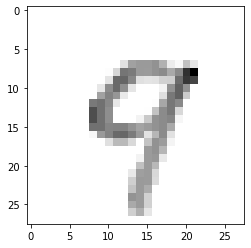

In [8]:
predictions = ann.predict([x_test]) # make predictions
print("The number is probably a", np.argmax(predictions[12])) # print the first prediction
plt.imshow(x_test[12], cmap=plt.cm.binary) # show the first image
plt.show() # show the image

In [9]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Flatten
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier

def create_model():
 # create model
 model = Sequential()
 model.add(Flatten(input_shape=(28,28)))
 model.add(Dense(128, activation='relu'))
 model.add(Dense(128, activation='relu'))
 model.add(Dense(10, activation='softmax'))
    # Compile model
 model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [2, 4, 6]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2024-01-09 12:53:19.224251: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:53:19.281469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:53:19.300705: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:53:19.321599: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 12:53:19.322905: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 12:53:19.333731: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-

Best: 0.968767 using {'batch_size': 10, 'epochs': 6}
0.961283 (0.002923) with: {'batch_size': 10, 'epochs': 2}
0.965733 (0.005038) with: {'batch_size': 10, 'epochs': 4}
0.968767 (0.001759) with: {'batch_size': 10, 'epochs': 6}
0.960783 (0.002073) with: {'batch_size': 20, 'epochs': 2}
0.965383 (0.002187) with: {'batch_size': 20, 'epochs': 4}
0.967950 (0.002496) with: {'batch_size': 20, 'epochs': 6}
0.958717 (0.002713) with: {'batch_size': 40, 'epochs': 2}
0.966283 (0.002461) with: {'batch_size': 40, 'epochs': 4}
0.968667 (0.003152) with: {'batch_size': 40, 'epochs': 6}
0.956583 (0.001847) with: {'batch_size': 60, 'epochs': 2}
0.964017 (0.001474) with: {'batch_size': 60, 'epochs': 4}
0.966700 (0.000041) with: {'batch_size': 60, 'epochs': 6}
0.953767 (0.000726) with: {'batch_size': 80, 'epochs': 2}
0.959667 (0.000878) with: {'batch_size': 80, 'epochs': 4}
0.966083 (0.001496) with: {'batch_size': 80, 'epochs': 6}
0.949717 (0.004540) with: {'batch_size': 100, 'epochs': 2}
0.962033 (0.000487

#### Hyperparameter tunning

In [10]:
'''
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

tuned_ann = AnnNeuralNetwork()
model = KerasClassifier(build_fn=tuned_ann, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
'''

'\nfrom sklearn.model_selection import GridSearchCV\nfrom scikeras.wrappers import KerasClassifier\n\ntuned_ann = AnnNeuralNetwork()\nmodel = KerasClassifier(build_fn=tuned_ann, verbose=0)\n\nbatch_size = [10, 20, 40, 60, 80, 100]\nepochs = [10, 50, 100]\nparam_grid = dict(batch_size=batch_size, epochs=epochs)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)\ngrid_result = grid.fit(x_train, y_train)\n'

Our model is performing quite good on the digit dataset. Let us now use a more robust and hard dataset, the fashion_mnist dataset

In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(x_train, y_train), (x_test, y_test)  = data

#scaling it so all values are between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

ann = AnnNeuralNetwork()
ann.train(x_train, y_train)
val_loss, val_acc = ann.evaluate(x_test, y_test)
print(val_loss, val_acc)


Epoch 1/3
1769/1875 [===========================>..] - ETA: 0s - loss: 0.4898 - accuracy: 0.8210

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4844 - accuracy: 0.8227
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3553 - accuracy: 0.8685
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.3570 - accuracy: 0.8708
0.35695305466651917 0.8708000183105469


In [14]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Flatten
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier

def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation=activation))
    model.add(Dense(128, activation=activation))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [2, 3, 4]
activation = ['softmax', 'relu', 'sigmoid']

param_grid = dict(model__activation=activation, batch_size=batch_size, epochs=epochs)


grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

2024-01-09 14:43:45.181195: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:43:45.377998: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:43:45.381768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-09 14:43:46.002179: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:43:46.035862: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-09 14:43:46.190179: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-

ValueError: 
All the 162 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
162 fits failed with the following error:
Traceback (most recent call last):
  File "/home/viper/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/viper/.local/lib/python3.8/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/home/viper/.local/lib/python3.8/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/home/viper/.local/lib/python3.8/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
  File "/home/viper/.local/lib/python3.8/site-packages/scikeras/wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
  File "/home/viper/.local/lib/python3.8/site-packages/scikeras/wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
TypeError: create_model() got an unexpected keyword argument 'activation'
